In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Pre-Processing

In [2]:
df = pd.read_csv('netflix_reviews.csv')

In [3]:
df.describe()

,score,thumbsUpCount
count,123860.000000,123860.000000
mean,2.831382,9.675819
std,1.712900,97.306045
min,1.000000,0.000000
25%,1.000000,0.000000
50%,3.000000,0.000000
75%,5.000000,1.000000
max,5.000000,8032.000000


In [4]:
df.shape

(123860, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123860 entries, 0 to 123859
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              123860 non-null  object
 1   userName              123858 non-null  object
 2   content               123855 non-null  object
 3   score                 123860 non-null  int64 
 4   thumbsUpCount         123860 non-null  int64 
 5   reviewCreatedVersion  104403 non-null  object
 6   at                    123860 non-null  object
 7   appVersion            104403 non-null  object
dtypes: int64(2), object(6)
memory usage: 7.6+ MB


In [6]:
df.nunique()

reviewId                123074
userName                 89848
content                 120657
score                        5
thumbsUpCount              906
reviewCreatedVersion       595
at                      123515
appVersion                 595
dtype: int64

In [7]:
df.isnull().sum()

reviewId                    0
userName                    2
content                     5
score                       0
thumbsUpCount               0
reviewCreatedVersion    19457
at                          0
appVersion              19457
dtype: int64

In [8]:
df.columns

Index(['reviewId', 'userName', 'content', 'score', 'thumbsUpCount',
       'reviewCreatedVersion', 'at', 'appVersion'],
      dtype='object')

In [9]:
# remove reviewCreatedVersion and appVersion columns
df.drop(columns = ['reviewCreatedVersion', 'appVersion'], inplace = True)

In [10]:
# remove rows with missing values in content and userName columns
df.dropna(subset=['content'], inplace=True)
df.dropna(subset=['userName'], inplace=True)

In [11]:
df['date'] = pd.to_datetime(df['at'])
df.drop(columns = ['at'], inplace = True)

# EDA

In [12]:
df.describe()

,score,thumbsUpCount,date
count,123853.000000,123853.000000,123853
mean,2.831357,9.676366,2021-11-22 17:19:44.449427712
min,1.000000,0.000000,2018-09-12 07:22:12
25%,1.000000,0.000000,2020-05-08 23:36:17
50%,3.000000,0.000000,2021-08-04 22:19:14
75%,5.000000,1.000000,2023-11-03 01:17:40
max,5.000000,8032.000000,2025-01-03 15:21:55
std,1.712904,97.308767,NaN


In [13]:
# create a month, day, and year column
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day


In [14]:
# excluding 2025 data
filtered_df = df[df['year']!=2025]

In [15]:
filtered_df

,reviewId,userName,content,score,thumbsUpCount,date,year,month,day
341,6fcd7344-d13e-46f5-ac98-d0ebec6ecb3b,ayuni ayuni,Can you prolong Big bang theory series in Netf...,5,0,2024-12-31 15:43:14,2024,12,31
342,de92d64e-999b-4cbd-8487-518126fe0629,goat and birds channel,NICE APP,5,0,2024-12-31 15:42:23,2024,12,31
343,754c9b1e-9bfa-4c23-b658-8a8804033265,Prashanth Annam,West app,1,0,2024-12-31 15:38:05,2024,12,31
344,258242e4-ba13-4233-88a0-147c721fd65f,Shubham Kadam,Primium mat maro जो movie चाहिय ओ नही मिलती मे...,1,0,2024-12-31 15:35:33,2024,12,31
345,b113fac2-503f-4acf-8480-4f099e7706be,Jahnavi Reddy,This APP IS VERY GOOD INFACT ULTIMATE I even d...,5,0,2024-12-31 15:34:33,2024,12,31
...,...,...,...,...,...,...,...,...,...
123855,a760ead9-e7aa-4ed1-a651-5c37c3600dac,A Google user,i really like it! there are so many movies and...,5,0,2019-08-03 15:06:03,2019,8,3
123856,4957f9e7-d7f4-4a52-9764-031cebcac83f,Captain Jeoy,I love Netflix. I always enjoy my time using it.,5,0,2022-08-15 16:16:30,2022,8,15
123857,9acf7586-7abf-4b50-8c50-3ede3b2a42c4,Suryansh,Sound quality is very slow of movies,1,0,2020-08-17 07:26:58,2020,8,17
123858,32870f7f-c461-4256-b602-75244ca60248,A Google user,Rate is very expensive.. bcos we see netflix s...,1,0,2019-07-21 09:41:42,2019,7,21


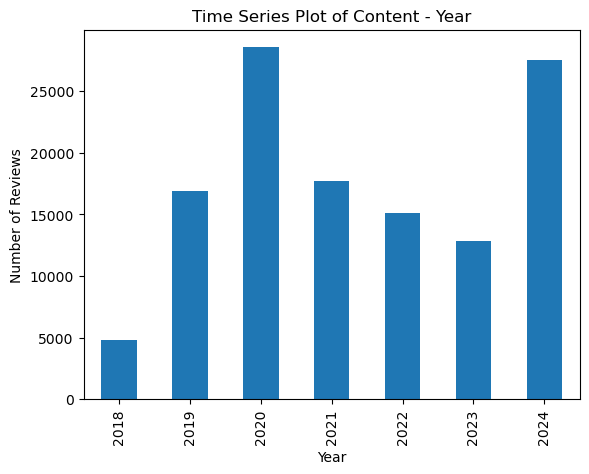

In [16]:
time_series = filtered_df.groupby('year').size()
time_series.plot(kind='bar', title='Time Series Plot of Content - Year', xlabel='Year', ylabel='Number of Reviews')
plt.show()

<Axes: title={'center': 'Time Series Plot of Content- Year & Month'}, xlabel='Year, Month', ylabel='Number of Reviews'>

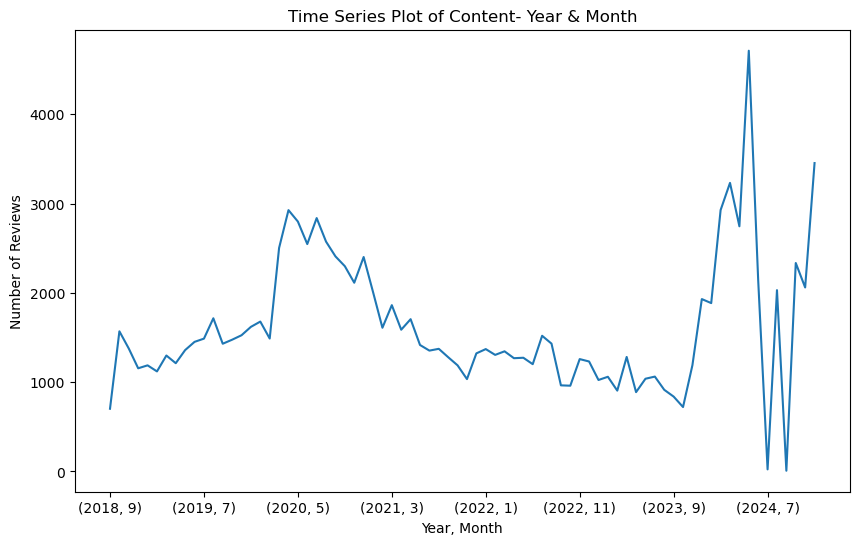

In [17]:
plt.figure(figsize=(10,6))
filtered_df.groupby(['year','month']).size().plot(kind='line', title='Time Series Plot of Content- Year & Month', xlabel='Year, Month', ylabel='Number of Reviews')


In [18]:
filtered_df

,reviewId,userName,content,score,thumbsUpCount,date,year,month,day
341,6fcd7344-d13e-46f5-ac98-d0ebec6ecb3b,ayuni ayuni,Can you prolong Big bang theory series in Netf...,5,0,2024-12-31 15:43:14,2024,12,31
342,de92d64e-999b-4cbd-8487-518126fe0629,goat and birds channel,NICE APP,5,0,2024-12-31 15:42:23,2024,12,31
343,754c9b1e-9bfa-4c23-b658-8a8804033265,Prashanth Annam,West app,1,0,2024-12-31 15:38:05,2024,12,31
344,258242e4-ba13-4233-88a0-147c721fd65f,Shubham Kadam,Primium mat maro जो movie चाहिय ओ नही मिलती मे...,1,0,2024-12-31 15:35:33,2024,12,31
345,b113fac2-503f-4acf-8480-4f099e7706be,Jahnavi Reddy,This APP IS VERY GOOD INFACT ULTIMATE I even d...,5,0,2024-12-31 15:34:33,2024,12,31
...,...,...,...,...,...,...,...,...,...
123855,a760ead9-e7aa-4ed1-a651-5c37c3600dac,A Google user,i really like it! there are so many movies and...,5,0,2019-08-03 15:06:03,2019,8,3
123856,4957f9e7-d7f4-4a52-9764-031cebcac83f,Captain Jeoy,I love Netflix. I always enjoy my time using it.,5,0,2022-08-15 16:16:30,2022,8,15
123857,9acf7586-7abf-4b50-8c50-3ede3b2a42c4,Suryansh,Sound quality is very slow of movies,1,0,2020-08-17 07:26:58,2020,8,17
123858,32870f7f-c461-4256-b602-75244ca60248,A Google user,Rate is very expensive.. bcos we see netflix s...,1,0,2019-07-21 09:41:42,2019,7,21


# NLP

In [19]:
import re

def remove_emojis_from_text(text):
    """
    Remove all emojis from the input text.
    
    Args:
    text (str): The input string from which emojis need to be removed.

    Returns:
    str: Text with emojis removed.
    """
    # Emoji pattern
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"  # Emoticons
        "\U0001F300-\U0001F5FF"  # Symbols & Pictographs
        "\U0001F680-\U0001F6FF"  # Transport & Map Symbols
        "\U0001F1E0-\U0001F1FF"  # Flags (iOS)
        "\U00002702-\U000027B0"  # Miscellaneous Symbols
        "\U000024C2-\U0001F251"  # Enclosed Characters
        "]+",
        flags=re.UNICODE
    )
    # Remove emojis
    return emoji_pattern.sub(r'', text)

def clean_dataframe_column(df, column_name):
    """
    Remove emojis from the specified column of a DataFrame.
    
    Args:
    df (pd.DataFrame): The DataFrame containing the text column.
    column_name (str): The column name where text needs to be cleaned.

    Returns:
    pd.DataFrame: DataFrame with the cleaned column.
    """
    df[column_name] = df[column_name].astype(str).apply(remove_emojis_from_text)
    return df


In [20]:
cleaned_df = clean_dataframe_column(filtered_df, 'content')

C:\Users\Babli Dey\AppData\Local\Temp\ipykernel_32140\298848825.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = df[column_name].astype(str).apply(remove_emojis_from_text)


In [21]:
#clean the labelled dataset
# labelled_df = pd.read_excel('dec24.xlsx')
# labelled_df = clean_dataframe_column(labelled_df, 'content')

In [22]:
cleaned_df.shape

(123513, 9)

In [23]:
#labelled_df.shape

In [24]:
# drop the rows from clean dataset that are present in the labelled dataset base on reviewId and date
# cleaned_df=cleaned_df[~(cleaned_df['reviewId'].isin(labelled_df['reviewId']) & cleaned_df['date'].isin(labelled_df['date']))]

In [25]:
# drop blank rows from the content column for both dataframes
cleaned_df = cleaned_df[cleaned_df['content'].str.strip() != '']

In [27]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import torch.nn.functional as F

# Load the pre-trained XLM-Roberta model for language identification
MODEL_NAME = "papluca/xlm-roberta-base-language-detection"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Function to detect language
def detect_language(text):
    try:
        # Tokenize the input text
        inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True).to(device)

        # Get model predictions
        with torch.no_grad():
            outputs = model(**inputs)

        # Apply softmax to get probabilities
        probs = F.softmax(outputs.logits, dim=1)

        # Get the language code with the highest probability
        predicted_class = torch.argmax(probs, dim=1).item()

        # Get language labels
        labels = model.config.id2label

        return labels[predicted_class]
    except Exception as e:
        return f"Error: {str(e)}"

# Apply the language detection function to the dataframe
def detect_language_gpu(row):
    text = row["content"]
    return detect_language(text)

cleaned_df["language"] = cleaned_df.apply(detect_language_gpu, axis=1)

# Display the dataframe
print(cleaned_df)


c:\Users\Babli Dey\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:795: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


                                    reviewId                userName  \
341     6fcd7344-d13e-46f5-ac98-d0ebec6ecb3b             ayuni ayuni   
342     de92d64e-999b-4cbd-8487-518126fe0629  goat and birds channel   
343     754c9b1e-9bfa-4c23-b658-8a8804033265         Prashanth Annam   
344     258242e4-ba13-4233-88a0-147c721fd65f           Shubham Kadam   
345     b113fac2-503f-4acf-8480-4f099e7706be           Jahnavi Reddy   
...                                      ...                     ...   
123855  a760ead9-e7aa-4ed1-a651-5c37c3600dac           A Google user   
123856  4957f9e7-d7f4-4a52-9764-031cebcac83f            Captain Jeoy   
123857  9acf7586-7abf-4b50-8c50-3ede3b2a42c4                Suryansh   
123858  32870f7f-c461-4256-b602-75244ca60248           A Google user   
123859  dc1352e9-10a8-41ca-ab23-05d045b08e90              suraj soni   

                                                  content  score  \
341     Can you prolong Big bang theory series in Netf...      5   

C:\Users\Babli Dey\AppData\Local\Temp\ipykernel_32140\3926332422.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["language"] = cleaned_df.apply(detect_language_gpu, axis=1)


In [41]:
cleaned_df.to_csv('results/cleaned_reviews_languagedetected.csv', index=False)

In [28]:
cleaned_df

,reviewId,userName,content,score,thumbsUpCount,date,year,month,day,language
341,6fcd7344-d13e-46f5-ac98-d0ebec6ecb3b,ayuni ayuni,Can you prolong Big bang theory series in Netf...,5,0,2024-12-31 15:43:14,2024,12,31,en
342,de92d64e-999b-4cbd-8487-518126fe0629,goat and birds channel,NICE APP,5,0,2024-12-31 15:42:23,2024,12,31,it
343,754c9b1e-9bfa-4c23-b658-8a8804033265,Prashanth Annam,West app,1,0,2024-12-31 15:38:05,2024,12,31,en
344,258242e4-ba13-4233-88a0-147c721fd65f,Shubham Kadam,Primium mat maro जो movie चाहिय ओ नही मिलती मे...,1,0,2024-12-31 15:35:33,2024,12,31,hi
345,b113fac2-503f-4acf-8480-4f099e7706be,Jahnavi Reddy,This APP IS VERY GOOD INFACT ULTIMATE I even d...,5,0,2024-12-31 15:34:33,2024,12,31,en
...,...,...,...,...,...,...,...,...,...,...
123855,a760ead9-e7aa-4ed1-a651-5c37c3600dac,A Google user,i really like it! there are so many movies and...,5,0,2019-08-03 15:06:03,2019,8,3,en
123856,4957f9e7-d7f4-4a52-9764-031cebcac83f,Captain Jeoy,I love Netflix. I always enjoy my time using it.,5,0,2022-08-15 16:16:30,2022,8,15,en
123857,9acf7586-7abf-4b50-8c50-3ede3b2a42c4,Suryansh,Sound quality is very slow of movies,1,0,2020-08-17 07:26:58,2020,8,17,en
123858,32870f7f-c461-4256-b602-75244ca60248,A Google user,Rate is very expensive.. bcos we see netflix s...,1,0,2019-07-21 09:41:42,2019,7,21,en


In [31]:
cleaned_df.drop_duplicates(subset=['reviewId'],keep = 'first' ,inplace=True)

C:\Users\Babli Dey\AppData\Local\Temp\ipykernel_32140\3273363578.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.drop_duplicates(subset=['reviewId'],keep = 'first' ,inplace=True)


In [37]:
# divide the dataset into english and non-english
en_df = cleaned_df[cleaned_df['language'] == 'en']
nonen_df = cleaned_df[cleaned_df['language'] != 'en']

# check the shape of the dataframes
print(en_df.shape)
print(nonen_df.shape)

(120550, 10)
(2001, 10)


In [42]:
# preprocess the english dataframe
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download NLTK data
nltk.download('stopwords')


# Initialize stop words and stemmer
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

# Define preprocessing function
def preprocess_text(text):
    # Remove emojis
    text = re.sub(r'[^\w\s,]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords and stem words
    words = text.split()
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    # Join words back into a single string
    text = ' '.join(words)
    return text

# Apply preprocessing to 'content' column
en_df['processed_content'] = en_df['content'].apply(preprocess_text)

# Show the resulting DataFrame
print(en_df)


[nltk_data] Downloading package stopwords to C:\Users\Babli
[nltk_data]     Dey\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                    reviewId         userName  \
341     6fcd7344-d13e-46f5-ac98-d0ebec6ecb3b      ayuni ayuni   
343     754c9b1e-9bfa-4c23-b658-8a8804033265  Prashanth Annam   
345     b113fac2-503f-4acf-8480-4f099e7706be    Jahnavi Reddy   
347     39923caa-1af7-4123-859f-76087131ce1c       Joy Sadang   
348     d40c0dbd-b85b-4734-bc96-74725a144f62       Marc Human   
...                                      ...              ...   
123855  a760ead9-e7aa-4ed1-a651-5c37c3600dac    A Google user   
123856  4957f9e7-d7f4-4a52-9764-031cebcac83f     Captain Jeoy   
123857  9acf7586-7abf-4b50-8c50-3ede3b2a42c4         Suryansh   
123858  32870f7f-c461-4256-b602-75244ca60248    A Google user   
123859  dc1352e9-10a8-41ca-ab23-05d045b08e90       suraj soni   

                                                  content  score  \
341     Can you prolong Big bang theory series in Netf...      5   
343                                              West app      1   
345     This AP

C:\Users\Babli Dey\AppData\Local\Temp\ipykernel_32140\96242704.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  en_df['processed_content'] = en_df['content'].apply(preprocess_text)


In [44]:
en_df.to_csv('results/cleaned_reviews_en_processed.csv', index=False)